## This is an example of how to use Hierarchical Agglomerative Clustering Method for Cluster Analysis of quantitative data, using Python, Pandas, NumPy, SciPy, Scikit-learn, Pingouin, Matplotlib, Seaborn and Plotly

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("dark_background")
import seaborn as sns
import scipy.cluster.hierarchy as sch
import scipy.stats as stats
from scipy.stats import zscore
from scipy.spatial.distance import pdist
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
import pingouin as pg
import plotly.express as px
import os
import plotly.io as pio
if os.getenv("GITHUB_ACTIONS") == "true":
    pio.renderers.default = "png"
else:
    pio.renderers.default='colab'

- the formulas shown at this notebook have been taken from the following reference:

    FÁVERO, L. P.; BELFIORE, P. Manual de Análise de Dados: Estatística e Machine Learning com Excel®, SPSS®, Stata®, R® e Python®. 2ª edição, 1288 p. Brasil: ccGEN LTC, 2024.
    
    Available in Brazil at:
    
    https://www.amazon.com.br/Manual-An-C3-A1lise-Dados-Estat-C3-ADstica-Learning-dp-8595159920/dp/8595159920

## Use Case Scenario and Data - Countries' stats-based Clusterization

In this sample use case, we have 167 countries and some stats on them, which are: child mortality rate (per 1,000 live births), exports (% of GDP), health spending (% of GDP), imports (% of GDP), income per person (US$), inflation rate (%), life expectancy (years) and total fertility rate (children per woman). We want to proceed Cluster Analysis on this data in order to segment (clusterize) the countries according to data patterns not yet known, so that strategic insights can be taken out of the final segmentation.

In [2]:
# reading and displaying our dataset
countries_data = pd.read_csv("countries_data.csv")
countries_data_without_country = countries_data.drop(columns=["country"])
countries_data

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [3]:
countries_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          167 non-null    object 
 1   child_mortality  167 non-null    float64
 2   exports          167 non-null    float64
 3   health           167 non-null    float64
 4   imports          167 non-null    float64
 5   income           167 non-null    int64  
 6   inflation        167 non-null    float64
 7   life_expectancy  167 non-null    float64
 8   total_fertility  167 non-null    float64
 9   gdpp             167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


In [4]:
countries_data_without_country.describe()

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [5]:
# Variables have very different range and units, regarding their values, therefore we should first normalize them:
countries_data_without_country_normalized = countries_data_without_country.apply(zscore,ddof=1)
countries_data_without_country_normalized

,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp
0,1.287660,-1.134867,0.278251,-0.082208,-0.805822,0.156864,-1.614237,1.897176,-0.677143
1,-0.537333,-0.478220,-0.096725,0.070624,-0.374243,-0.311411,0.645924,-0.857394,-0.484167
2,-0.272015,-0.098824,-0.963176,-0.639838,-0.220182,0.786908,0.668413,-0.038289,-0.463980
3,2.001787,0.773056,-1.443729,-0.164820,-0.583289,1.382894,-1.175698,2.121770,-0.514720
4,-0.693548,0.160186,-0.286034,0.496076,0.101427,-0.599944,0.702147,-0.540321,-0.041692
...,...,...,...,...,...,...,...,...,...
162,-0.224902,0.200315,-0.569997,0.239979,-0.736313,-0.488315,-0.849606,0.364658,-0.545273
163,-0.524935,-0.459980,-0.693776,-1.209860,-0.033442,3.606020,0.544723,-0.315728,0.029235
164,-0.371199,1.126916,0.008851,1.375892,-0.656429,0.408503,0.286097,-0.659224,-0.635842
165,0.447072,-0.405259,-0.595481,-0.515920,-0.656948,1.496416,-0.343599,1.137523,-0.635842


In [6]:
# we have 9 variables in this use case, therefore we can't represent them in 3 dimensions, as for each dimension you'd represent
# one variable. For plotting a graph we'd have to choose 3 variables only, and that would probably not represent correctly the
# segmentation we'd like to perform. But, we could plot as below, for example considering income, life_expectancy and gdpp:

import plotly.graph_objects as go
fig = go.Figure()

# ---------- Countries scatter ----------
fig.add_trace(go.Scatter3d(
    x=countries_data_without_country_normalized["income"],
    y=countries_data_without_country_normalized["life_expectancy"],
    z=countries_data_without_country_normalized["gdpp"],
    mode='markers+text',
    text=countries_data["country"],
    textposition='top center',
    textfont=dict(size=10),
    name="Country",
    marker=dict(size=3, color="green")
))

# ---------- Layout ----------
fig.update_layout(
    title=dict(
        text="Countries Stats - Initial Data Visualization ",
        subtitle=dict(
            text="(3D Space: Income × Life Expectancy × GDPP)",
            font=dict(size=11)
        ),
        x=0.5,
        xanchor='center',
        font=dict(size=14),
        pad=dict(t=0, b=0)
    ),
    legend=dict(
        itemsizing='constant',
        font=dict(size=11)
    ),
    showlegend=True,
    scene=dict(
        xaxis=dict(title=dict(text="income",font=dict(size=10)),tickfont=dict(size=9)),
        yaxis=dict(title=dict(text="life_expectancy",font=dict(size=10)),tickfont=dict(size=9)),
        zaxis=dict(title=dict(text="gdpp",font=dict(size=10)),tickfont=dict(size=9))
    ),
    width=600,
    height=500,
    margin=dict(
        l=80,
        r=80,
        t=90,
        b=50
    )
)

# ---------- Save ----------
fig.write_html('countries_initial.html')
fig.show()

## Hierarchical Agglomerative Clustering Method

In [7]:
# creating and showing the dissimilarity matrix for the distance type "euclidean" between the 167 countries, taken 2 at a time. We 
# don't have to create this matrix explicitly, as, implicitly, it's already created when generating the clusters dendrogram. It's 
# useful though to have a view of the distances between each element's (country) values from the 9 variables, as it is this 
# distance between values that will be used to determine the sequence at each cluster combination (for single, complete or average 
# linkage types). This distance is later used at each phase of cluster formation, always resulting in the aggregating of two 
# observations (either isolated or previously clustered observations) according to the shortest distance. There 
# are many sorts of dissimilarity calculation measures, as well as of linkage types, but the aggregation, ultimately, is always by 
# clustering the shortest distance observations (based on the dissimilarity measure and linkage method chosen). For the 167 
# observations (countries), we have 13861 combinations (n!/(r!(n-r)!)), taken 2 at a time (repetitions and ordering disregarded).

distance_matrix_euclidean = pdist(countries_data_without_country_normalized, metric="euclidean")
pd.DataFrame(data=[distance_matrix_euclidean], index=["EUCLIDEAN DIST"]).T

,EUCLIDEAN DIST
0,4.130922
1,3.885865
2,2.990652
3,4.400212
4,4.169492
...,...
13856,3.101867
13857,4.886886
13858,3.430695
13859,4.353697


In [8]:
# Having decided the method for calculating the dissimilarity distance between each isolated observation (and done the calculus), 
# we must proceed with the cluster formation phases. The aggregation of each two isolated observations between themselves or 
# between one isolated observation and a previous cluster (with more than one observation) is always done considering the shortest 
# distance. In the second case, though, we must also decide what to compare and what distance to consider, as we have more than one 
# observation in a same cluster being compared its distance to the distance of another cluster or isolated observation. In such a 
# case we must chose the linkage method: single linkage, complete linkage or average linkage. For each aggregation phase concluded, 
# we keep the distance considered for that chosen aggregation row - which is the aggregation cost, calculated according to the 
# chosen linkage method. This aggregation cost is not necessarily any of the values from the dissimilarity distance matrix, 
# although is derived from those (applied at the linkage method). Each dissimilarity distance is between two isolated observations 
# - always, while the distance considered as the aggregation cost may be between two clusters, a cluster and an isolated 
# observation or between two isolated observations as well. Each aggregation phase result, and aggregation distance for that 
# combination, then form the graphical dendrogram below.

\* see aggregation phasing thorough explanation at the other use case example, at this same project directory:<br>
[sample-ml-clustering-hierarchical-agglomerative-student(colab-version).ipynb](./sample-ml-clustering-hierarchical-agglomerative-student(colab-version).ipynb) <br>
The more observations we have, the harder would be to perform each aggregation manually, keeping each aggregation cost, all that based on the dissimilarity distances. So let us let the algorithms do it for us and simply show us the result, at a final dendrogram.

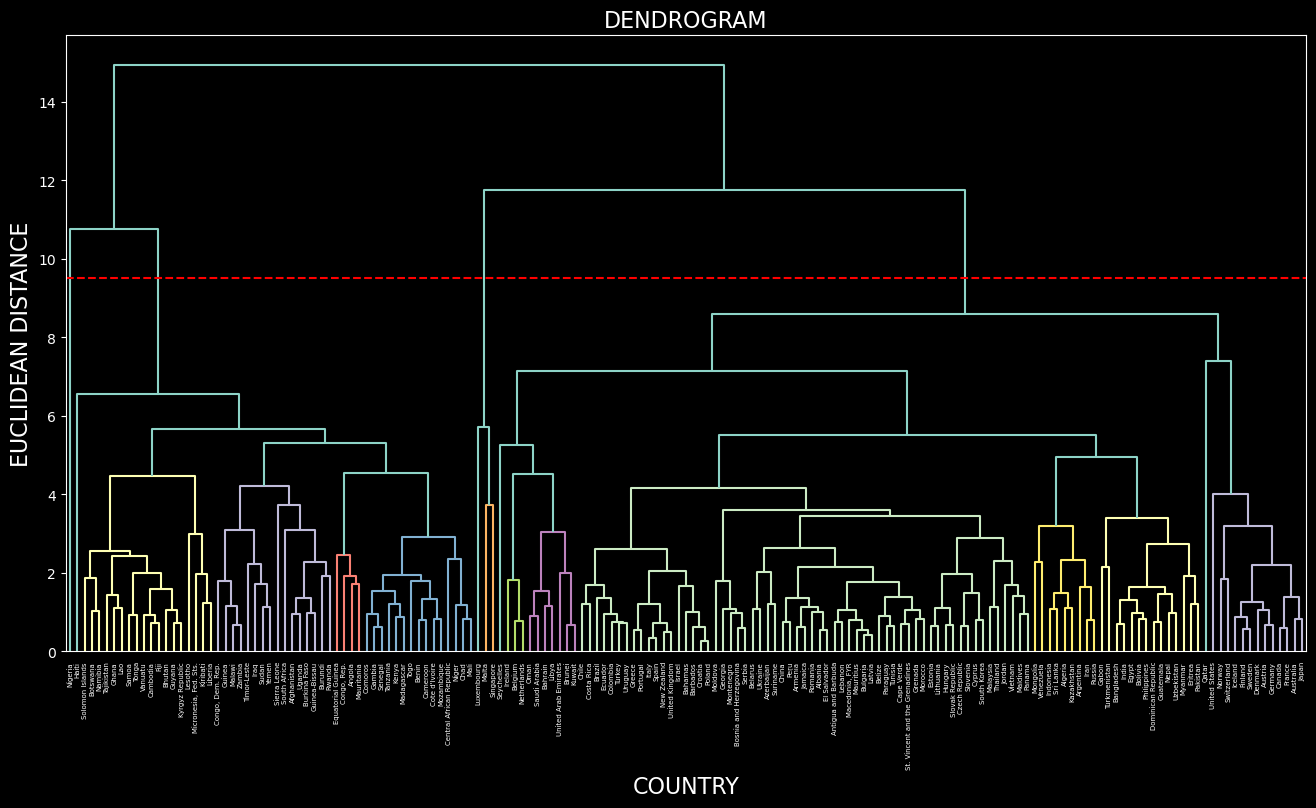

In [9]:
# performing the clustering (graphic solution) and plotting the dendrogram, after setting the distance and linkage type to be used
plt.figure(figsize=(16,8))
dendrogram_euclidean_metric_single_linkage_data_array = sch.linkage(countries_data_without_country_normalized, method="complete", metric="euclidean")
dendrogram_s = sch.dendrogram(dendrogram_euclidean_metric_single_linkage_data_array, color_threshold = 4.5, labels = list(countries_data.country))
plt.title('DENDROGRAM', fontsize=16)
plt.xlabel('COUNTRY', fontsize=16)
plt.ylabel('EUCLIDEAN DISTANCE', fontsize=16)
plt.axhline(y = 9.5, color = 'red', linestyle = '--')
plt.show()

In [10]:
# we could try other metric types (dissimilarity distance calculation types) and linkage methods to analyse different dendrograms, 
# although the result of the clustering should be the same or something very close

In [11]:
# at the dendrogram above, based on the distances, it's been evaluated as ideal, for this use case, that we should have 4 clusters, 
# defined by the dashed horizontal red line. Eventual further aggregations was considered to be too costly in terms of distance 
# (between formed clusters). This decision is subjective, though, and more than one solution could be considered right. As a 
# common sense, if the distance to aggregate the next cluster is too big, we stop the aggregation at that state... in this case, 
# with 4 distinct clusters.

In [12]:
# performing the clustering (numerical solution) and adding a categorical (qualitative) variable to describe which cluster each 
# store belongs to. Although numerical, these are simply categorical labels (identifiers of each cluster). This is done after 
# we have already performed the aggregation and decided how many clusters we wish to keep independent from each other. Below we
# have clusters 0, cluster 1, cluster 2 and cluster 3 - with their respective clustered (similar) countries, based on the 9 
# comparing vabriables of our data. 
# These are exactly the same clusters at the dendrogram above (the order is irrelevant).
cluster_indicator_generator = AgglomerativeClustering(n_clusters = 4, metric = 'euclidean', linkage = 'complete')
cluster_indicators_generated = cluster_indicator_generator.fit_predict(countries_data_without_country_normalized)
countries_data['CLUSTER_INDICATOR_COMPLETE'] = cluster_indicators_generated
countries_data['CLUSTER_INDICATOR_COMPLETE'] = countries_data['CLUSTER_INDICATOR_COMPLETE'].astype('category')
countries_data

,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,CLUSTER_INDICATOR_COMPLETE
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [13]:
# Cluster 0
print(f"Cluster 0 number of elements: {len(countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==0])}")
countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==0].head(10)

Cluster 0 number of elements: 109


,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,CLUSTER_INDICATOR_COMPLETE
1,Albania,16.6,28.0,6.55,48.6,9930,4.490,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.100,76.5,2.89,4460,0
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.440,76.8,2.13,12200,0
5,Argentina,14.5,18.9,8.10,16.0,18700,20.900,75.8,2.37,10300,0
6,Armenia,18.1,20.8,4.40,45.3,6700,7.770,73.3,1.69,3220,0
7,Australia,4.8,19.8,8.73,20.9,41400,1.160,82.0,1.93,51900,0
8,Austria,4.3,51.3,11.00,47.8,43200,0.873,80.5,1.44,46900,0
9,Azerbaijan,39.2,54.3,5.88,20.7,16000,13.800,69.1,1.92,5840,0
10,Bahamas,13.8,35.0,7.89,43.7,22900,-0.393,73.8,1.86,28000,0
11,Bahrain,8.6,69.5,4.97,50.9,41100,7.440,76.0,2.16,20700,0


In [14]:
# Cluster 1
print(f"Cluster 1 number of elements: {len(countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==1])}")
countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==1].head(10)

Cluster 1 number of elements: 54


,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,CLUSTER_INDICATOR_COMPLETE
0,Afghanistan,90.2,10.00,7.58,44.9,1610,9.440,56.2,5.82,553,1
3,Angola,119.0,62.30,2.85,42.9,5900,22.400,60.1,6.16,3530,1
17,Benin,111.0,23.80,4.10,37.2,1820,0.885,61.8,5.36,758,1
18,Bhutan,42.7,42.50,5.20,70.7,6420,5.990,72.1,2.38,2180,1
21,Botswana,52.5,43.60,8.30,51.3,13300,8.920,57.1,2.88,6350,1
25,Burkina Faso,116.0,19.20,6.74,29.6,1430,6.810,57.9,5.87,575,1
26,Burundi,93.6,8.92,11.60,39.2,764,12.300,57.7,6.26,231,1
27,Cambodia,44.4,54.10,5.68,59.5,2520,3.120,66.1,2.88,786,1
28,Cameroon,108.0,22.20,5.13,27.0,2660,1.910,57.3,5.11,1310,1
31,Central African Republic,149.0,11.80,3.98,26.5,888,2.010,47.5,5.21,446,1


In [15]:
# Cluster 2
print(f"Cluster 2 number of elements: {len(countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==2])}")
countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==2].head(10)

Cluster 2 number of elements: 3


,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,CLUSTER_INDICATOR_COMPLETE
91,Luxembourg,2.8,175.0,7.77,142.0,91700,3.620,81.3,1.63,105000,2
98,Malta,6.8,153.0,8.65,154.0,28300,3.830,80.3,1.36,21100,2
133,Singapore,2.8,200.0,3.96,174.0,72100,-0.046,82.7,1.15,46600,2


In [16]:
# Cluster 3
print(f"Cluster 3 number of elements: {len(countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==3])}")
countries_data[countries_data['CLUSTER_INDICATOR_COMPLETE']==3].head(10)

Cluster 3 number of elements: 1


,country,child_mortality,exports,health,imports,income,inflation,life_expectancy,total_fertility,gdpp,CLUSTER_INDICATOR_COMPLETE
113,Nigeria,130.0,25.3,5.07,17.4,5150,104.0,60.5,5.84,2330,3


In [17]:
countries_data.groupby("CLUSTER_INDICATOR_COMPLETE", observed=True).agg(
    COUNTRY=("country", list),
    AVG_CHILD_MORTALITY=("child_mortality", "mean"),
    AVG_EXPORTS=("exports", "mean"),
    AVG_HEALTH=("health", "mean"),
    AVG_IMPORTS=("imports", "mean"),
    AVG_INCOME=("income", "mean"),
    AVG_INFLATION=("inflation", "mean"),
    AVG_LIFE_EXPECTANCY=("life_expectancy", "mean"),
    AVG_TOTAL_FERTILITY=("total_fertility", "mean"),
    AVG_GDPP=("gdpp", "mean")
).reset_index().style.hide(axis="index")

CLUSTER_INDICATOR_COMPLETE,COUNTRY,AVG_CHILD_MORTALITY,AVG_EXPORTS,AVG_HEALTH,AVG_IMPORTS,AVG_INCOME,AVG_INFLATION,AVG_LIFE_EXPECTANCY,AVG_TOTAL_FERTILITY,AVG_GDPP
0,"['Albania', 'Algeria', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Bolivia', 'Bosnia and Herzegovina', 'Brazil', 'Brunei', 'Bulgaria', 'Canada', 'Cape Verde', 'Chile', 'China', 'Colombia', 'Costa Rica', 'Croatia', 'Cyprus', 'Czech Republic', 'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Eritrea', 'Estonia', 'Finland', 'France', 'Gabon', 'Georgia', 'Germany', 'Greece', 'Grenada', 'Guatemala', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kuwait', 'Latvia', 'Lebanon', 'Libya', 'Lithuania', 'Macedonia, FYR', 'Malaysia', 'Maldives', 'Mauritius', 'Moldova', 'Mongolia', 'Montenegro', 'Morocco', 'Myanmar', 'Nepal', 'Netherlands', 'New Zealand', 'Norway', 'Oman', 'Pakistan', 'Panama', 'Paraguay', 'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Saudi Arabia', 'Serbia', 'Seychelles', 'Slovak Republic', 'Slovenia', 'South Korea', 'Spain', 'Sri Lanka', 'St. Vincent and the Grenadines', 'Suriname', 'Sweden', 'Switzerland', 'Thailand', 'Tunisia', 'Turkey', 'Turkmenistan', 'Ukraine', 'United Arab Emirates', 'United Kingdom', 'United States', 'Uruguay', 'Uzbekistan', 'Venezuela', 'Vietnam']",17.028440,42.291550,6.909358,43.039137,22581.559633,6.478321,75.302752,2.098073,17310.458716
1,"['Afghanistan', 'Angola', 'Benin', 'Bhutan', 'Botswana', 'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Central African Republic', 'Chad', 'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', ""Cote d'Ivoire"", 'Equatorial Guinea', 'Fiji', 'Gambia', 'Ghana', 'Guinea', 'Guinea-Bissau', 'Guyana', 'Haiti', 'Iraq', 'Kenya', 'Kiribati', 'Kyrgyz Republic', 'Lao', 'Lesotho', 'Liberia', 'Madagascar', 'Malawi', 'Mali', 'Mauritania', 'Micronesia, Fed. Sts.', 'Mozambique', 'Namibia', 'Niger', 'Rwanda', 'Samoa', 'Senegal', 'Sierra Leone', 'Solomon Islands', 'South Africa', 'Sudan', 'Tajikistan', 'Tanzania', 'Timor-Leste', 'Togo', 'Tonga', 'Uganda', 'Vanuatu', 'Yemen', 'Zambia']",81.344444,31.520741,6.660185,49.111111,3787.462963,8.926389,60.555556,4.697037,1910.074074
2,"['Luxembourg', 'Malta', 'Singapore']",4.133333,176.000000,6.793333,156.666667,64033.333333,2.468000,81.433333,1.380000,57566.666667
3,['Nigeria'],130.000000,25.300000,5.070000,17.400000,5150.000000,104.000000,60.500000,5.840000,2330.000000


In [18]:
# distances where each cluster has been formed at the dendrogram (at each hierarchical agglomerative stage) (see dendrogram above)
[d[1] for d in dendrogram_s["dcoord"]]

[np.float64(1.032850343175387),
 np.float64(1.868338994208481),
 np.float64(1.1061665517668842),
 np.float64(1.428090609712109),
 np.float64(0.934423119369477),
 np.float64(0.7206179478102575),
 np.float64(0.9280452464912076),
 np.float64(0.7348534057380853),
 np.float64(1.0601502574127633),
 np.float64(1.5923849647753905),
 np.float64(2.007014076843092),
 np.float64(2.425662061075058),
 np.float64(2.5619828848504542),
 np.float64(1.2419129627136005),
 np.float64(1.9762076208140555),
 np.float64(3.0039622718968704),
 np.float64(4.461264047508116),
 np.float64(0.679707265450597),
 np.float64(1.1672183777757985),
 np.float64(1.7921146582196015),
 np.float64(1.1216518863849838),
 np.float64(1.7185734485380189),
 np.float64(2.233343145014411),
 np.float64(3.098378327522898),
 np.float64(0.9526785986557282),
 np.float64(0.9916528882599963),
 np.float64(1.3609063740093847),
 np.float64(1.9106639167459836),
 np.float64(2.272394219193498),
 np.float64(3.081781821449138),
 np.float64(3.74143441

In [40]:
# the same initial plotting data, considered only variables: income, life_expectancy and gdpp (as we can't represent all 9), now 
# with the final clustering result, in colors. Have in mind that the clustering has been done based on all 9 variables, and here
# we're representing only 3 of those, that's why this representation below may eventually not be clear regarding the clustering 
# segmentation. In such a case, when we have more than 3 variables, we should analyse the clusters and their final elements in the
# tables (dataframes) themselves - with all variables - and not in 3D-scatter graphs.
import plotly.graph_objects as go
import plotly.io as pio

fig = go.Figure()

# get unique clusters
clusters = countries_data["CLUSTER_INDICATOR_COMPLETE"].unique()

# set discrete colors for each cluster number (instead of colorscale)
cluster_colors = {
    0: '#08519c',
    1: 'green',
    2: 'red',
    3: 'yellow'
}

# loop through clusters and create a separate trace for each
for cluster in clusters:
    cluster_data = countries_data[countries_data["CLUSTER_INDICATOR_COMPLETE"] == cluster]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_data["income"],
        y=cluster_data["life_expectancy"],
        z=cluster_data["gdpp"],
        mode='markers+text',
        text=cluster_data["country"],
        textposition='top center',
        textfont=dict(size=10),
        name=f"Cluster {cluster}",
        marker=dict(
            size=4,
            color=cluster_colors[cluster],
            # colorscale='Rainbow',
            showscale=False
        )
    ))

fig.update_layout(
    title=dict(
        text="Countries Stats - Hierarchical Agglomerative Clustering - Final",
        subtitle=dict(
            text="(3D Space: Income × Life Expectancy × GDPP)",
            font=dict(size=11)
        ),
        x=0.5,
        xanchor='center',
        font=dict(size=14),
        pad=dict(t=0, b=0)
    ),
    legend=dict(
        itemsizing='constant',
        font=dict(size=11)
    ),
    showlegend=True,
    scene=dict(
        xaxis=dict(title=dict(text="income", font=dict(size=10)), tickfont=dict(size=9)),
        yaxis=dict(title=dict(text="life_expectancy", font=dict(size=10)), tickfont=dict(size=9)),
        zaxis=dict(title=dict(text="gdpp", font=dict(size=10)), tickfont=dict(size=9))
    ),
    width=600,
    height=500,
    margin=dict(l=80, r=80, t=90, b=50)
)

fig.write_html('countries_final_hierarchical.html')
fig.show()


In [41]:
# another perspective (another 3-variable graph): child_mortality x inflation x gdpp. You could test graphs for all possible 
# variable combinations, taking 3 at a time

import plotly.graph_objects as go
import plotly.io as pio

fig = go.Figure()

# get unique clusters
clusters = countries_data["CLUSTER_INDICATOR_COMPLETE"].unique()

# set discrete colors for each cluster number (instead of colorscale)
cluster_colors = {
    0: '#08519c',
    1: 'green',
    2: 'red',
    3: 'yellow'
}

# loop through clusters and create a separate trace for each
for cluster in clusters:
    cluster_data = countries_data[countries_data["CLUSTER_INDICATOR_COMPLETE"] == cluster]
    
    fig.add_trace(go.Scatter3d(
        x=cluster_data["child_mortality"],
        y=cluster_data["inflation"],
        z=cluster_data["gdpp"],
        mode='markers+text',
        text=cluster_data["country"],
        textposition='top center',
        textfont=dict(size=10),
        name=f"Cluster {cluster}",
        marker=dict(
            size=4,
            color=cluster_colors[cluster],
            # colorscale='Rainbow',
            showscale=False
        )
    ))

fig.update_layout(
    title=dict(
        text="Countries Stats - Hierarchical Agglomerative Clustering - Final",
        subtitle=dict(
            text="(3D Space: Child Mortality × Inflation × GDPP)",
            font=dict(size=11)
        ),
        x=0.5,
        xanchor='center',
        font=dict(size=14),
        pad=dict(t=0, b=0)
    ),
    legend=dict(
        itemsizing='constant',
        font=dict(size=11)
    ),
    showlegend=True,
    scene=dict(
        xaxis=dict(title=dict(text="child_mortality", font=dict(size=10)), tickfont=dict(size=9)),
        yaxis=dict(title=dict(text="inflation", font=dict(size=10)), tickfont=dict(size=9)),
        zaxis=dict(title=dict(text="gdpp", font=dict(size=10)), tickfont=dict(size=9))
    ),
    width=600,
    height=500,
    margin=dict(l=80, r=80, t=90, b=50)
)

fig.write_html('countries_final_hierarchical_2.html')
fig.show()


In [21]:
# Dissimilarity distances (according to each method chosen), as well as the variables' values, do not change when we use different 
# linkage methods. What may vary is the aggregation distance at each phase (the aggregation cost), the number of phases and the
# dendrogram and final matrix with the output of the clustering, as the clusters might be different in number and in elements 
# composing them.